# Comparison on error variation on the experiments of Q-OMP, Q-MPb and Q-MPc

## Read Data from files

In [5]:
import numpy as np
import json

In [6]:
iterations = 10
xi = 0.005
kind = 'QOMP'
step = 0.005
size = 1050
stop_size = 0
low=0

In [7]:
names = list()
errors = list()
for i in range(0, iterations, 1):
    names.append('data_dump_' + "{:.3f}".format(xi) +'_'+kind+ '_R.json')#+'_red'_R
    errors.append(xi)
    xi = xi + step
names

['data_dump_0.005_QOMP_R.json',
 'data_dump_0.010_QOMP_R.json',
 'data_dump_0.015_QOMP_R.json',
 'data_dump_0.020_QOMP_R.json',
 'data_dump_0.025_QOMP_R.json',
 'data_dump_0.030_QOMP_R.json',
 'data_dump_0.035_QOMP_R.json',
 'data_dump_0.040_QOMP_R.json',
 'data_dump_0.045_QOMP_R.json',
 'data_dump_0.050_QOMP_R.json']

## Computation of different metrics

In [8]:
data = []
c_mean = []
q_mean = []
sim_mean = []
c_res = []
q_res = []
sim= []
overall_sim = []

for i in range(0, iterations, 1):
    with open(names[i]) as f:
        data.append(json.load(f))

    c = list(data[i]["class_k"])
    q = list(data[i]["quant_k"])
    c_res_par = list(data[i]["class_residuals"])
    q_res_par = list(data[i]["quant_residuals"])
    c_mean_sub = []
    q_mean_sub = []
    sim_mean_sub = []
    sim=[]

    time_list = []
    count = 0
    print(len(c))


    for j in range(0, len(c), 1):
        for k in range(0, 100, 1):
            sim.append(q[j][k]/c[j][k])
        c_mean_sub.append(np.mean(c[j]))
        q_mean_sub.append(np.mean(q[j]))
        sim_mean_sub.append(q_mean_sub[j]/c_mean_sub[j])

    c_mean.append(c_mean_sub)
    q_mean.append(q_mean_sub)
    sim_mean.append(sim_mean_sub)
    c_res.append(c_res_par)
    q_res.append(q_res_par)
    overall_sim.append(sim)

similarities = list()
deviations = list()
c_residuals = list()
c_res_devi = list()
q_residuals = list()
q_res_devi = list()

for i in range(0, iterations, 1):
    similarities.append(np.mean(sim_mean[i]))
    deviations.append(np.std(sim_mean[i]))
    c_residuals.append(np.mean(c_res[i]))
    c_res_devi.append(np.std(c_res[i]))
    q_residuals.append(np.mean(q_res[i]))
    q_res_devi.append(np.std(q_res[i]))

20
20
20
20
20
20
20
20
20
20


In [9]:
overall_sim_mean= []
overall_sim_devi = []
for i in range(0, iterations,1):
    overall_sim_mean.append(np.mean(overall_sim[i]))
    overall_sim_devi.append(np.std(overall_sim[i]))

In [10]:
len(overall_sim)

10

In [11]:
len(overall_sim[0])

2000

In [12]:
class_res_full= list(data[0]["class_residuals_full"])

In [13]:
mean_list =[]
for i in range(0, 10,1):
    class_res_full= list(data[i]["class_residuals_full"])
    mean_list =[]
    for j in range(0,100,1):
        mean_list.append(class_res_full[-1][j][0])

np.mean(mean_list)

14.182604143769233

## Plot the results

<function matplotlib.pyplot.show(close=None, block=None)>

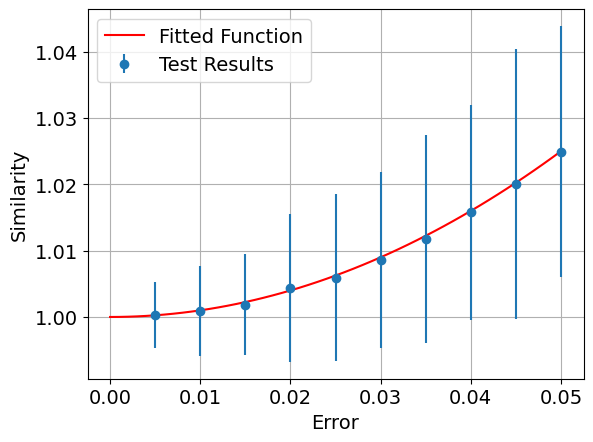

In [14]:
import numpy as np
def f(x):
   return 1+10*x**2

x = np.array(range(0, 51, 1))
x = 0.001* x

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.plot(x, f(x), color='red', label='Fitted Function')
plt.errorbar(errors, overall_sim_mean, overall_sim_devi, linestyle='none', marker="o", label="Test Results")
plt.xlabel("Error")
plt.ylabel("Similarity")
plt.grid()
plt.legend(loc='upper left')
img_name = 'ev_'+kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '.pdf'
plt.savefig(img_name, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

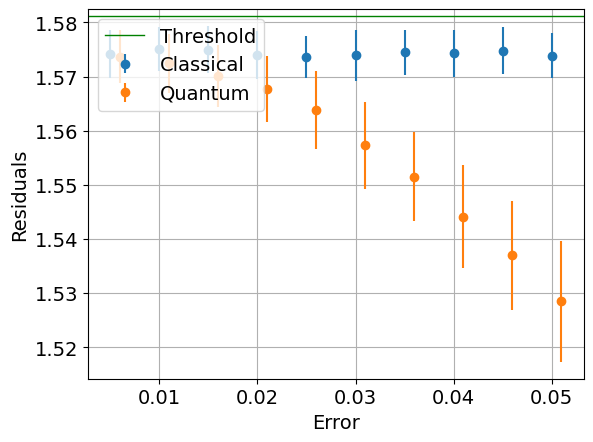

In [15]:
from matplotlib import pyplot as plt
plt.errorbar(errors, c_residuals, c_res_devi, linestyle='none', marker="o", label="Classical")
plt.errorbar(errors+np.ones(len(errors))*0.001, q_residuals, q_res_devi, linestyle='none', marker="o", label="Quantum")
plt.xlabel("Error")
plt.ylabel("Residuals")
plt.axhline(y=1.58113883, linewidth=1, label= 'Threshold', color='green')
plt.legend(loc='upper left')
plt.grid()
img_name = 'rev_'+kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '.pdf'
plt.savefig(img_name, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

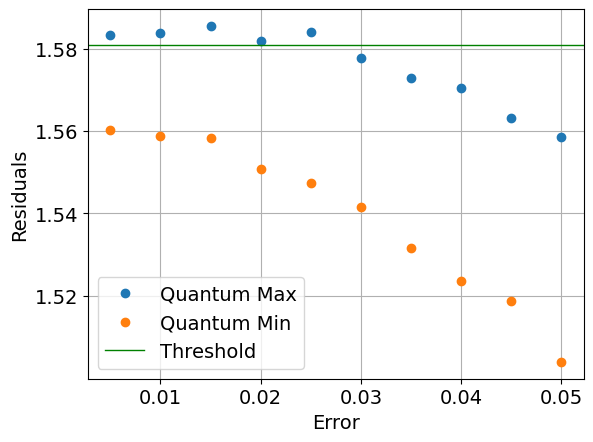

In [16]:
minies_c = []
maxies_c = []
minies_q = []
maxies_q = []
for i in range(0, iterations,1):
    maxies_c.append(np.max(c_res[i]))
    minies_c.append(np.min(c_res[i]))
    maxies_q.append(np.max(q_res[i]))
    minies_q.append(np.min(q_res[i]))

from matplotlib import pyplot as plt
plt.plot(errors, maxies_q, linestyle='none', marker="o", label="Quantum Max")
plt.plot(errors, minies_q, linestyle='none', marker="o", label="Quantum Min")

plt.xlabel("Error")
plt.ylabel("Residuals")
plt.axhline(y=1.581, linewidth=1, label= 'Threshold', color='green')

plt.yticks([1.52, 1.54, 1.56, 1.58])

plt.grid()
plt.legend()
img_name = '2_rev_'+kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '.pdf'
plt.savefig(img_name, bbox_inches='tight')
plt.show

In [17]:
components = np.arange(50, size, 50)
components

array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])

<function matplotlib.pyplot.show(close=None, block=None)>

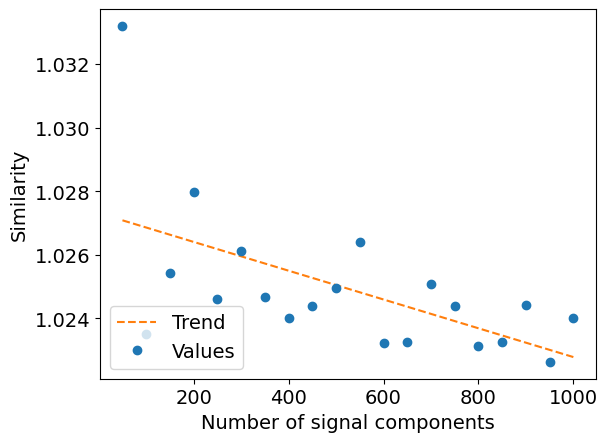

In [18]:
from matplotlib import pyplot as plt

plt.errorbar(components, sim_mean[9],label='Values', linestyle='none', marker="o")
z = np.polyfit(components, sim_mean[9], 1)
p = np.poly1d(z)
plt.plot(components, p(components), label='Trend', linestyle='--')
plt.xlabel("Number of signal components")
plt.ylabel("Similarity")
img_name = 'dimdep_' +kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '0.01.png'
plt.legend(loc='lower left')
plt.savefig(img_name, bbox_inches='tight')
plt.show

In [19]:
dimdep_mean=[]
dimdep_std=[]
for i in range(0, 20, 1):
    dimdep_mean.append(np.mean(overall_sim[2][i*100:(i+1)*100]))
    dimdep_std.append(np.std(overall_sim[2][i*100:(i+1)*100]))
dimdep_std[0]=dimdep_std[1]

<function matplotlib.pyplot.show(close=None, block=None)>

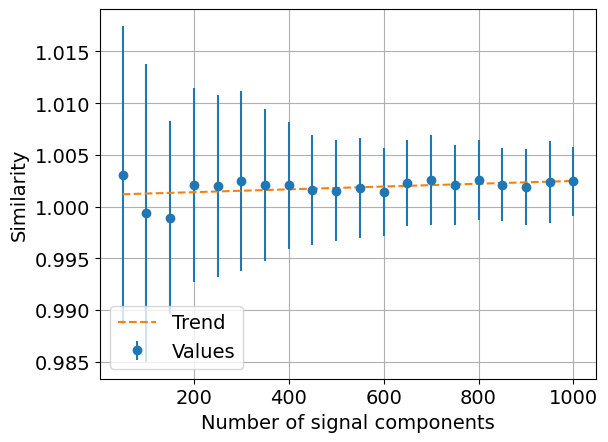

In [20]:
from matplotlib import pyplot as plt

plt.errorbar(components, dimdep_mean, dimdep_std,label='Values', linestyle='none', marker="o")
z = np.polyfit(components, dimdep_mean, 1)
p = np.poly1d(z)
plt.plot(components, p(components), label='Trend', linestyle='--')
plt.xlabel("Number of signal components")
plt.ylabel("Similarity")
plt.grid()
img_name = 'dimdep_' +kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '0.01.pdf'
# 'dimdep_QOMP_0.01.png'
plt.legend(loc='lower left')
plt.savefig(img_name, bbox_inches='tight')
plt.show

In [23]:
points = range(50, 1000, 50)
values_1 = [2.1117386988228324, 2.7960898991215335, 3.3510713732447637, 3.797937539318769, 4.145341371780828, 4.515315135220936, 4.805744179740705, 5.116566072880284, 5.412650465241296, 5.653221608007904, 5.895292835778647, 6.133472504981657, 6.389437753553705, 6.572428700183614, 6.795720850753744, 7.005811575269201, 7.1921308031541, 7.381021299717059, 7.564889258094162]
values_2 = [1.477564533230616, 1.5650702261802076, 1.6188349796967203, 1.6537347366619963, 1.6631962024291107, 1.6802404603860348, 1.6819940552640378, 1.700698136597343, 1.705331008102793, 1.7067224652078408, 1.7108546427159639, 1.7171896008934318, 1.7282223439470308, 1.730560189330872, 1.7299942736948222, 1.733916433196895, 1.7330078547291903, 1.7354012648933428, 1.7364416621531342]

<function matplotlib.pyplot.show(close=None, block=None)>

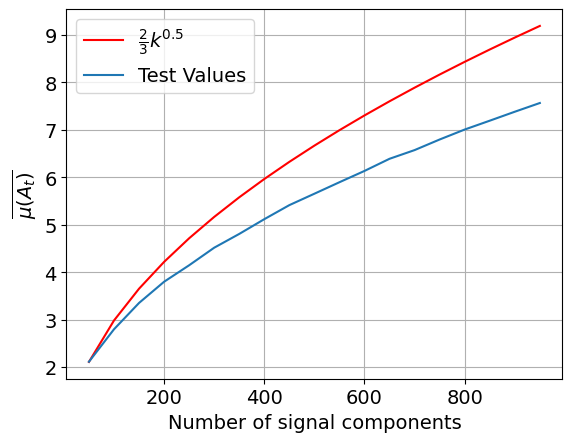

In [24]:
import numpy as np
def f(x):
   return 2/3*np.sqrt(x/5)

x = np.array(range(50, 1000, 50))

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.plot(x, f(x), color='red', label='$\\frac{2}{3}k^{0.5}$')

plt.plot(points, values_1, label='Test Values')
plt.xlabel("Number of signal components")
plt.ylabel("$\overline{\mu (A_t)}$")
plt.grid()
plt.legend()
img_name = 'mu_' +kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '0.01.pdf'
# 'dimdep_QOMP_0.01.png'
plt.savefig(img_name, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

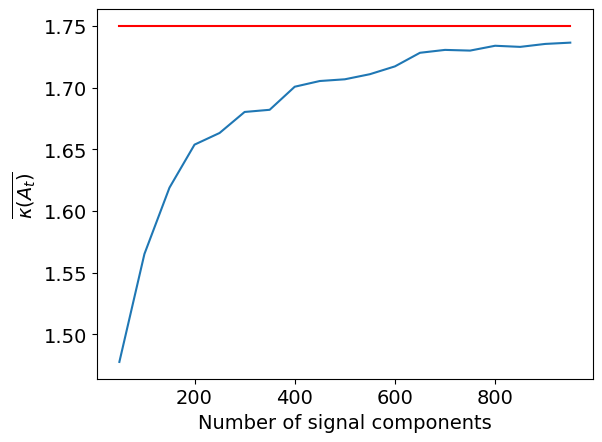

In [25]:
from matplotlib import pyplot as plt
x = range(50, 1000, 50)
plt.rcParams.update({'font.size': 14})
plt.plot(points, np.ones(len(points))*1.75, color='red', label='Fitted Function')
plt.plot(points, values_2, label='Kappa')
plt.xlabel("Number of signal components")
plt.ylabel("$\overline{\kappa (A_t)}$")
img_name = 'ka_' +kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '0.01.png'
plt.savefig(img_name, bbox_inches='tight')
plt.show